# Exercises: Comparing ETFs - Answer Key
By Christopher van Hoecke, Maxwell Margenot, and Delaney Mackenzie


## Lecture Link :
https://www.quantopian.com/lectures/statistical-moments

https://www.quantopian.com/lectures/hypothesis-testing

###IMPORTANT NOTE: 
This lecture corresponds to the statistical moments and hypothesis testing lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

When you feel comfortable with the topics presented here, see if you can create an algorithm that qualifies for the Quantopian Contest. Participants are evaluated on their ability to produce risk-constrained alpha and the top 10 contest participants are awarded cash prizes on a daily basis.

https://www.quantopian.com/contest

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts
t-statistic formula for unequal variances : $ t = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$

Where $s_1$ and $s_2$ are the standard deviation of set 1 and set 2; and $n_1$ and $n_2$ are the number of observations we have.

In [1]:
# Useful functions
def normal_test(X):
    z, pval = stats.normaltest(X)
    if pval < 0.05:
        print 'Values are not normally distributed.'
    else: 
        print 'Values are normally distributed.'
    return

In [2]:
# Useful Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#### Data:

In [3]:
# Get pricing data for an energy (XLE) and industrial (XLI) ETF
xle = get_pricing('XLE', fields = 'price', start_date = '2016-01-01', end_date = '2017-01-01')
xli = get_pricing('XLI', fields = 'price', start_date = '2016-01-01', end_date = '2017-01-01')

# Compute returns
xle_returns = xle.pct_change()[1:]
xli_returns = xli.pct_change()[1:]

## Exercise 1 : Hypothesis Testing on Variances. 
- Plot the histogram of the returns of XLE and XLI
- Check to see if each return stream is normally distributed
- If the assets are normally distributed, use the F-test to perform a hypothesis test and decide whether they have the two assets have the same variance.
- If the assets are **not** normally distributed, use the Levene test (in the scipy library) to perform a hypothesis test on variance. 

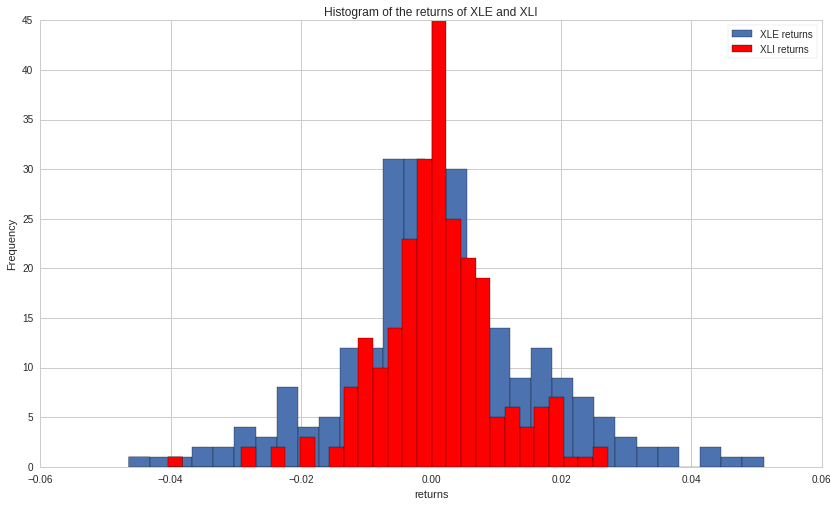

In [4]:
xle = plt.hist(xle_returns, bins=30)
xli = plt.hist(xli_returns, bins=30, color='r')

plt.xlabel('returns')
plt.ylabel('Frequency')
plt.title('Histogram of the returns of XLE and XLI')
plt.legend(['XLE returns', 'XLI returns']);

In [5]:
# Checking for normality using function above. 

print 'XLE'
normal_test(xle_returns)
print 'XLI'
normal_test(xli_returns)

XLE
Values are normally distributed.
XLI
Values are not normally distributed.


In [6]:
# Because the data is not normally distributed, we must use the levene and not the F-test of variance. 

stats.levene(xle_returns, xli_returns)

LeveneResult(statistic=42.17712538196367, pvalue=2.0149310189859354e-10)

Since we find a pvalue for the Levene test of less than our $\alpha$ level (0.05), we can reject the null hypothesis that the variability of the two groups are equal thus implying that **the variances are unequal.**

-----

## Exercise 2 : Hypothesis Testing on Means.

Since we know that the variances are not equal, we must use Welch's t-test. 
- Calculate the mean returns of XLE and XLI.
    - Find the difference between the two means.
- Calculate the standard deviation of the returns of XLE and XLI
- Using the formula given above, calculate the t-test statistic (Using $\alpha = 0.05$) for Welch's t-test to test whether the mean returns of XLE and XLI are different.
- Consult the [Hypothesis Testing Lecture](https://www.quantopian.com/lectures#Hypothesis-Testing) to calculate the p-value for this test. Are the mean returns of XLE and XLI the same?

- Now use the t-test function for two independent samples from the scipy library. Compare the results.

In [7]:
# Manually calculating the t-statistic

N1 = len(xle_returns)
N2 = len(xli_returns)

m1 = xle_returns.mean()
m2 = xli_returns.mean()

s1 = xle_returns.std()
s2 = xli_returns.std()

test_statistic = (m1 - m2) / (s1**2 / N1 + s2**2 / N2)**0.5
print 't-test statistic:', test_statistic

t-test statistic: 0.246212554505


In [8]:
# Alternative form, using the scipy library on python. 

stats.ttest_ind(xle_returns, xli_returns, equal_var=False)

Ttest_indResult(statistic=0.24621255450523835, pvalue=0.80564256071472806)

----

## Exercise 3 : Skewness
- Calculate the mean and median of the two assets
- Calculate the skewness using the scipy library

In [9]:
# Calculate the mean and median of xle and xli using the numpy library

xle_mean = np.mean(xle_returns)
xle_median = np.median(xle_returns)
print 'Mean of XLE returns = ', xle_mean, '; median = ', xle_median

xli_mean = np.mean(xli_returns)
xli_median = np.median(xli_returns)
print 'Mean of XLI returns = ', xli_mean, '; median = ', xli_median

Mean of XLE returns =  0.0011018423017 ; median =  0.000303393455803
Mean of XLI returns =  0.000822235474081 ; median =  0.000546099936288


In [10]:
# Print values of Skewness for xle and xli returns 

print 'Skew of XLE returns:', stats.skew(xle_returns)
print 'Skew of XLI returns:',  stats.skew(xli_returns)

Skew of XLE returns: 0.090984051661
Skew of XLI returns: -0.332324357079


And the skewness of XLE returns of values > 0 means that there is more weight in the right tail of the distribution. The skewness of XLI returns of value > 0 means that there is more weight in the left tail of the distribution.

----

## Exercise 4 :  Kurtosis
- Check the kurtosis of the two assets, using the scipy library. 
- Using the seaborn library, plot the distribution of XLE and XLI returns. 

Recall: 
- Kurtosis > 3 is leptokurtic, a highly peaked, narrow deviation from the mean
- Kurtosis = 3 is mesokurtic. The most significant mesokurtic distribution is the normal distribution family. 
- Kurtosis < 3 is platykurtic, a lower-peaked, broad deviation from the mean 

In [11]:
# Print value of Kurtosis for xle and xli returns 

print 'kurtosis:', stats.kurtosis(xle_returns)
print 'kurtosis:', stats.kurtosis(xli_returns)

kurtosis: 0.854981014172
kurtosis: 2.17804780091


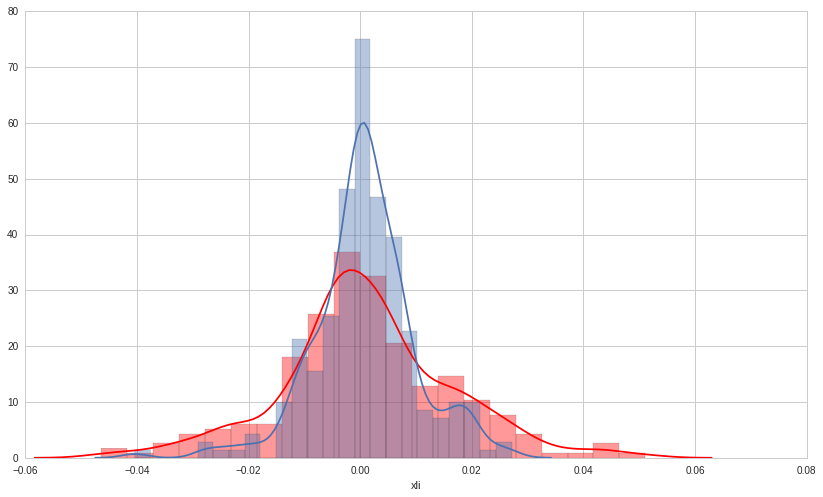

In [12]:
# Distribution plot of XLE returns in red (for Kurtosis of 1.6). 
# Distribution plot of XLI returns in blue (for Kurtosis of 2.0).

xle = sns.distplot(xle_returns, color = 'r', axlabel  = 'xle')
xli = sns.distplot(xli_returns, axlabel = 'xli');

We can clearly see from the two graphs that as our kurtosis gets lower, the distribution gets more flat.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*